In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from numpy.linalg import norm

[[0.         0.         0.        ]
 [0.05       0.         0.        ]
 [0.1        0.5        0.33333333]
 [0.15       0.25       0.66666667]
 [0.2        0.75       0.11111111]
 [0.25       0.125      0.44444444]
 [0.3        0.625      0.77777778]
 [0.35       0.375      0.22222222]
 [0.4        0.875      0.55555556]
 [0.45       0.0625     0.88888889]
 [0.5        0.5625     0.03703704]
 [0.55       0.3125     0.37037037]
 [0.6        0.8125     0.7037037 ]
 [0.65       0.1875     0.14814815]
 [0.7        0.6875     0.48148148]
 [0.75       0.4375     0.81481481]
 [0.8        0.9375     0.25925926]
 [0.85       0.03125    0.59259259]
 [0.9        0.53125    0.92592593]
 [0.95       0.28125    0.07407407]]


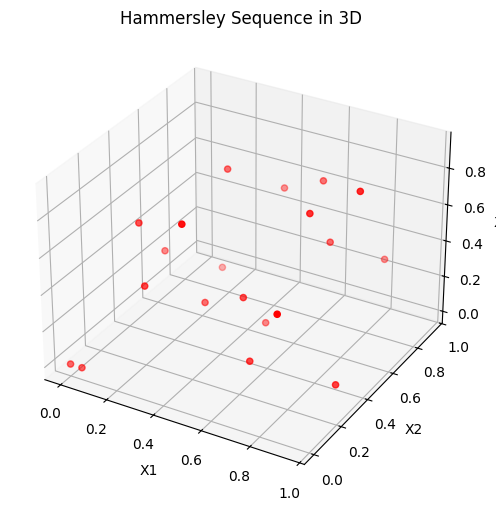

In [ ]:
""" genham.py """

def nbe(a,b):  
    numd = len(a) 
    na = a.copy()
    carry= True
    for i in reversed(range(numd)):
        if carry:
            if na[i] == b-1:
                na[i] = 0
            else:
                na[i] = na[i] + 1
                carry = False            
    if carry:
       na.insert(0,1)        
    return(na)

def vdc(b,N):
    out = np.zeros((N,1))
    numd = np.ceil(np.log(N)/np.log(b))
    bb = 1/b**np.arange(1,numd+1)
    a = []
    out[0] = 0
    for i in range(1,N):
        a = nbe(a,b)
        #print(a)
        ar = a[::-1]
        #print(ar, bb[0:len(ar)])
        out[i] = np.sum(ar*bb[0:len(ar)])
    return(out)

def halton(b,N):
   dim = len(b);
   out = np.zeros((N,dim))
   for i in range(0,dim):
      out[:,i] = vdc(b[i],N).reshape((N,))
   return(out)

# The Hammersley is a sequence of points that are more evenly distributed than purely random points.
def hammersley(b,N):
    dim = len(b);
    out = np.zeros((N,dim))
    h = halton(b[0:dim-1],N-1)
    h = h.reshape((N-1,dim-1))
    out[1:N,1:dim] = h
    out[:,0] = np.arange(N)/N
    return(out)

b = [2,3,5]
N = 20
points = hammersley(b,N)
print(points)

# Since it is 3 dimensional data, show the distribution using 3D Scatter plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], c='r', marker='o')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Hammersley Sequence in 3D')

plt.show()

[[-3.     -3.    ]
 [-2.7    -3.    ]
 [-2.4     0.    ]
 [-2.1    -1.5   ]
 [-1.8     1.5   ]
 [-1.5    -2.25  ]
 [-1.2     0.75  ]
 [-0.9    -0.75  ]
 [-0.6     2.25  ]
 [-0.3    -2.625 ]
 [ 0.      0.375 ]
 [ 0.3    -1.125 ]
 [ 0.6     1.875 ]
 [ 0.9    -1.875 ]
 [ 1.2     1.125 ]
 [ 1.5    -0.375 ]
 [ 1.8     2.625 ]
 [ 2.1    -2.8125]
 [ 2.4     0.1875]
 [ 2.7    -1.3125]]
[ 6.67128030e-05  2.90236776e-04 -4.27235071e-01  5.18883206e-02
  7.08353381e-02  7.37285266e-03 -1.70998631e+00  2.34481250e+00
  2.54064274e+00 -8.28222074e-01  4.10821862e-01 -3.42515772e+00
  4.82589627e+00 -2.98631953e+00  2.19824828e+00  2.86198996e+00
  5.18361207e-02 -5.80418410e-03  4.10485403e-01  2.39463033e-02]
-----XX
[[-3.         -3.         -3.         ... -3.         -3.
  -3.        ]
 [-2.95973154 -2.95973154 -2.95973154 ... -2.95973154 -2.95973154
  -2.95973154]
 [-2.91946309 -2.91946309 -2.91946309 ... -2.91946309 -2.91946309
  -2.91946309]
 ...
 [ 2.91946309  2.91946309  2.91946309 ...  2.

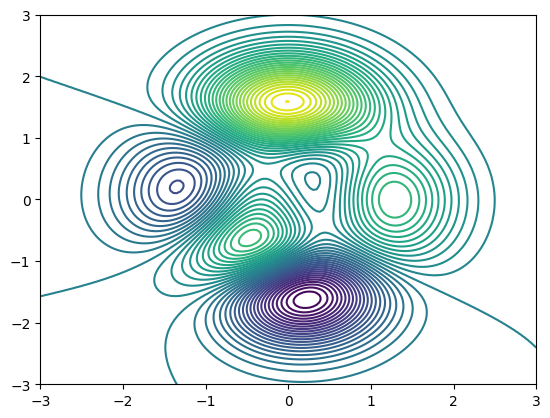

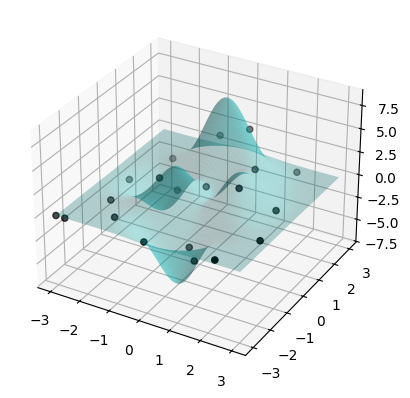

[[ 6.67128030e-05  4.67739716e-05  1.84747104e-05 ...  1.34134990e-03
   1.11220150e-03  9.17715681e-04]
 [ 5.17992012e-05  3.26399555e-05  4.49203191e-06 ...  1.58588210e-03
   1.31619418e-03  1.08714689e-03]
 [ 4.60328644e-05  2.85145488e-05  1.35773980e-06 ...  1.86768783e-03
   1.55175020e-03  1.28321323e-03]
 ...
 [ 1.27135910e-02  1.29023161e-02  1.30037130e-02 ... -1.27569596e-02
  -1.22447818e-02 -1.16878287e-02]
 [ 1.13812192e-02  1.15517103e-02  1.16439005e-02 ... -1.09618241e-02
  -1.05201648e-02 -1.00403567e-02]
 [ 1.01266077e-02  1.02785457e-02  1.03604795e-02 ... -9.36684975e-03
  -8.98829619e-03 -8.57738894e-03]]


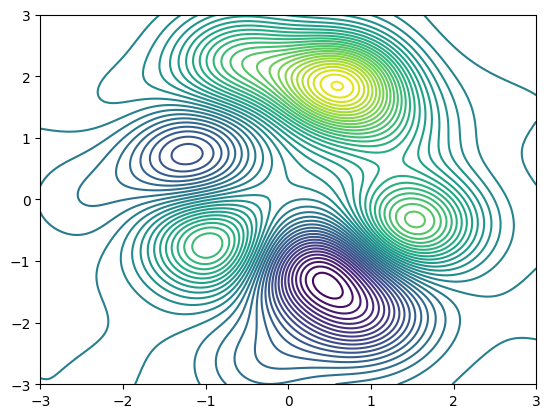

In [13]:
""" kernel.py """
# This module contains functions for computing kernel matrices and evaluating kernel functions.

# This function computes the peaks function.
# The function takes as input two 1D arrays x and y, which represent the coordinates of the points.
# It returns an array z, which contains the values of the function at the specified points.
# z can be visualized as the "height" dimension (surface with peaks and valleys)
def peaks(x,y):
    z =  (3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) 
          - 10*(x/5 - x**3 - y**5) * np.exp(-x**2 - y**2)
          - 1/3 * np.exp(-(x+1)**2 - y**2)) 
    return(z)

# Generate sample points (20 points) with the Hammersley sequence and evaluate the peaks function
n = 20
x = -3 + 6*hammersley([2,3],n)
print(x)
z = peaks(x[:,0],x[:,1])
print(z)
# xx and yy are 2D arrays created using np.mgrid, which represent a grid of points in the 2D space.
# They are used to evaluate the peaks function over a grid of points.
xx, yy = np.mgrid[-3:3:150j,-3:3:150j]
print("-----XX")
print(xx)
print("-----YY")
print(yy)
zz = peaks(xx,yy)
plt.contour(xx,yy,zz,levels=50)

fig=plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(xx,yy,zz,rstride=1,cstride=1,color='c',alpha=0.3,linewidth=0)
ax.scatter(x[:,0],x[:,1],z,color='k',s=20)
plt.show()

# This function computes the kernel matrix for a given set of input points.
# It takes as input a kernel function k, the number of points n, and the input data x and y.
# It returns the kernel matrix K and the dual coefficients alpha.
# kernel matrix K is a symmetric matrix where each element K[i,j] is the result of applying the kernel function k to the i-th and j-th data points.
# The dual coefficients alpha are obtained by solving the linear system K@K.T @ alpha = K@y.
def kernel_train(k, n, x, y):
    K = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            K[i,j] = k(x[i,:],x[j])
    alpha = np.linalg.solve(K@K.T, K@y)
    return K, alpha

# the sig2 kernel parameter is the variance of the Gaussian kernel (σ^2)
# It controls the width of the Gaussian kernel and thus the smoothness of the resulting function.
sig2 = 0.3 # kernel parameter
# Gaussian kernel function
# it computes the similarity between two input points x and u
# The similarity is higher when the points are closer together and lower when they are farther apart.
# alpha is the vector of dual coefficients
# It is obtained by solving the linear system K@K.T @ alpha = K@y.
def k(x,u):
   return(np.exp(-0.5*norm(x- u)**2/sig2))
K, alpha = kernel_train(k, n, x, z)

# N is the number of points in the grid
# It is used to create the kernel matrix Kx for the grid points.
# Kx is used to evaluate the kernel function for the grid points.
N, = xx.flatten().shape
Kx = np.zeros((n,N))
for i in range(n):
    for j in range(N):
        Kx[i,j] = k(x[i,:],np.array([xx.flatten()[j],yy.flatten()[j]]))

# g is the vector of predicted values for the grid points
# It is obtained by applying the kernel matrix Kx to the dual coefficients alpha.
# dim is the dimension of the grid
# It is used to reshape the predicted values into a 2D grid.
# yhat is the 2D grid of predicted values for the grid points.
g = Kx.T @ alpha
dim = np.sqrt(N).astype(int)
yhat = g.reshape((dim,dim))
print(yhat)
plt.contour(xx,yy,yhat,levels=50)

# Question 1
## 1.1
Please see the comments in code
## 1.2
Matrix K is matrix kernel (Gram matrix). It represents inner product all data.
## 1.3
Kernel function k is Gaussian kernel function. We need this function to create Gram matrix, in which the data point input is the training set x. From there, we calculate the value of alpha to form a predictor function so that predictions for new inputs are always expressed relative to the training data. 
This code represents the implementation of theory in video of the representer theorem, in which instead of using explicit features (which can be infinite), we use kernel trick and achieve the similar result by applying this predictor function.
## 1.4
To plot the final trained function, we can generate a dense data grid, as in the example code above using np.mgrid, then input each grid point into the prediction function. We then plot these predicted values ​​as contours. To test the resulting function, we can test it with a novel test set and compare the predicted results versus the original values ​​with the error measure.


## 1.5 Investigation with different kernel functions 
Setup: 
- Generate data with Hammersley
- See Gram matrix differences for different kernel functions

From the results of the experiment below, to see the distribution of the gram matrix, I visualized it with a heatmap. From there, we obtained

- Linear Kernels: repeating block patterns with positive and negative values. This reflects the dot product between points, so the values can vary depending on the position of the data.
- Polynomial kernel (degree 3): differences between points are amplified. Similar points produce very large values, while distant points become relatively small. This results in a high-contrast Gram matrix.
- Gaussian kernel: The Gram matrix is predominantly diagonal, with values ranging from 1 (on the diagonal, identical points) to near 0 (for distant points). 

Changes to kernel parameters will alter the shape of the Gram matrix:

Changing the value of poly_c (constant shift in the polynomial kernel):
- A larger poly_c value increases the baseline similarity, causing all elements of the Gram matrix to shift toward higher positive values.
- A smaller poly_c value (even negative) can produce more varied values, sometimes negative, and influence whether the relationships between points are amplified or weakened.

Changing the degree of the polynomial poly_d:
- Higher degree: amplifies differences. Similar points become even more similar (very large values), while dissimilar points become relatively smaller → the Gram matrix becomes more extreme.
- Lower degree (e.g., 2): the amplification effect is more moderate.

Changing the sig2 value
- Increasing: the Gaussian kernel becomes wider. All points are considered similar, so the Gram matrix tends to contain homogeneous high values (approaching a matrix filled with values close to 1).
- Decreasing: the Gaussian kernel becomes narrower. Only points that are very close are considered similar, and the Gram matrix approaches the identity matrix (1 on the diagonal, 0 elsewhere).


=== Linear kernel ===


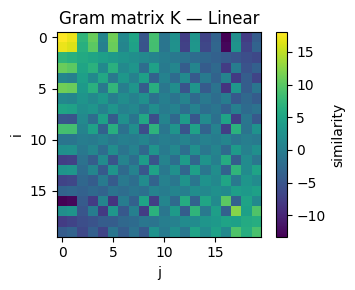


=== Poly kernel ===


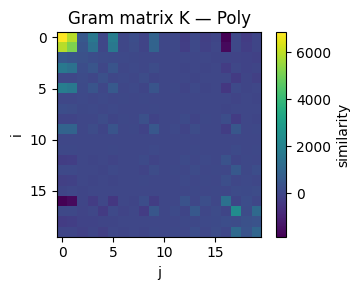


=== Gaussian kernel ===


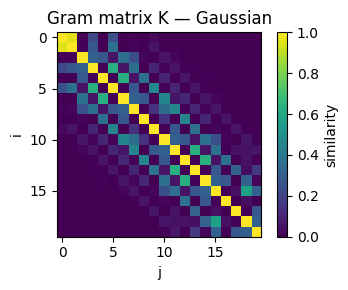

In [35]:
sig2 = 1             # Gaussian: sigma^2
# poly_c and poly_d are constants for the polynomial kernel
# They can affect the shape and complexity of the kernel function
# poly_c: additional constant
# poly_d: polynomial degree
poly_c, poly_d = 1.0, 3 # Polynomial: (x·u + poly_c)^poly_d

def k_linear(x,u):
    return np.dot(x,u)

def k_poly(x,u):
    return (np.dot(x,u) + poly_c)**poly_d

def k_rbf(x,u):
    return np.exp(-0.5*norm(x-u)**2 / sig2)

kernels = [
    ("Linear",   k_linear),
    ("Poly",     k_poly),
    ("Gaussian", k_rbf),
]

for name, kfun in kernels:
    # Use available kernel_train function
    K, alpha = kernel_train(kfun, n, x, z)

    # show heatmap K
    print(f"\n=== {name} kernel ===")

    plt.figure(figsize=(4,3))
    plt.imshow(K, cmap="viridis", interpolation="nearest")
    plt.colorbar(label="similarity")
    plt.title(f"Gram matrix K — {name}")
    plt.xlabel("j"); plt.ylabel("i")
    plt.tight_layout()
    plt.show()

## 1.6 Trying with different polynomial degree for K_poly

From experiments using differential polynomial degrees, the shape of the contour obtained can be seen. For degree 1, a repeating linear function is apparent. At degree 2, the contour begins to appear but its shape is not yet clear, while at degree 3, the peaks and valleys are visible, as shown in the code below. This is also empirically observed by comparing the RMSE values with the true peaks, where at degree 3 the values are higher, indicating a better match with the true peaks. (but more higher degree will make it overfitting, e.g when we try using degree of 4)



Polynomial kernel degree 1: RMSE vs true peaks = 1.7713


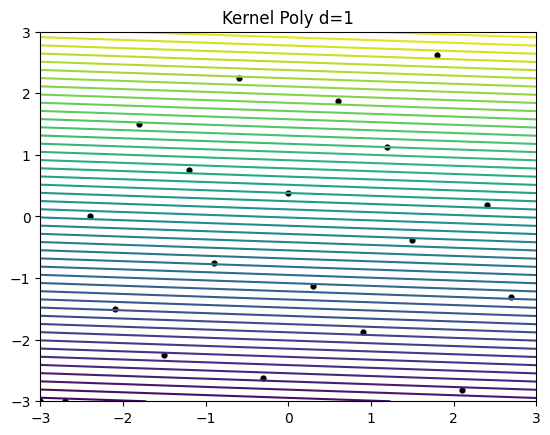

Polynomial kernel degree 2: RMSE vs true peaks = 1.8019


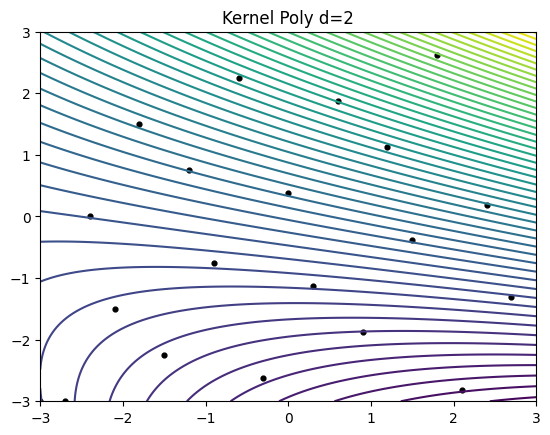

Polynomial kernel degree 3: RMSE vs true peaks = 1.9529


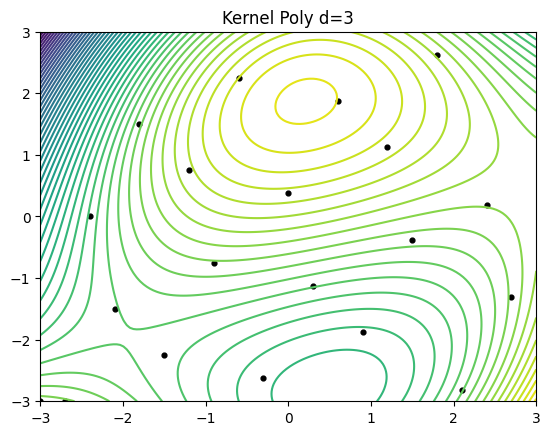

Polynomial kernel degree 4: RMSE vs true peaks = 3.9648


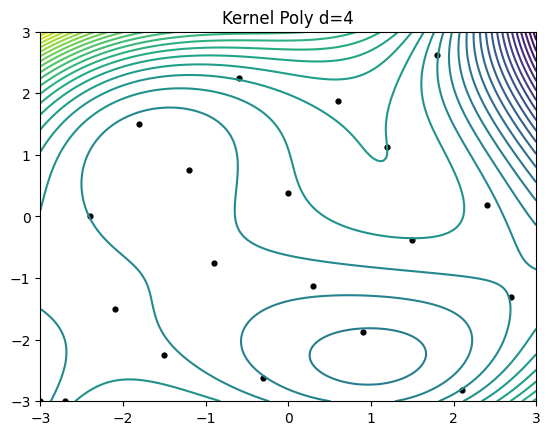

In [40]:
# ==== Polynomial kernel experiment====
poly_c = 1.0
degrees = [1, 2, 3, 4]  # Try with different polynomial degrees

for d in degrees:
    # Define polynomial kernel function
    def k(x, u, c=poly_c, deg=d):
        return (np.dot(x, u) + c)**deg

    # Train alpha coefficients with existing kernel_train
    K, alpha = kernel_train(k, n, x, z)

    # Predict on grid using existing blocks (build Kx -> g -> yhat)
    N, = xx.flatten().shape
    Kx = np.zeros((n, N))
    for i in range(n):
        for j in range(N):
            Kx[i, j] = k(x[i, :], np.array([xx.flatten()[j], yy.flatten()[j]]))
    g = Kx.T @ alpha
    dim = int(np.sqrt(N))
    yhat = g.reshape((dim, dim))

    # Compare with ground truth
    zz = peaks(xx, yy)
    rmse = np.sqrt(np.mean((yhat - zz)**2))
    print(f"Polynomial kernel degree {d}: RMSE vs true peaks = {rmse:.4f}")

    # Plot contour results
    plt.figure()
    plt.contour(xx, yy, yhat, levels=50)
    plt.scatter(x[:,0], x[:,1], s=12, c='k')
    plt.title(f"Kernel Poly d={d}")
    plt.show()
# ==========================================
